# Pred 확인하기

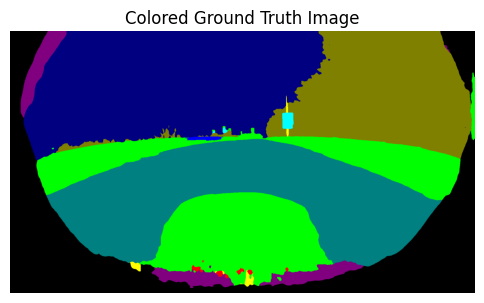

In [3]:
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt

now_str = '2023-09-18 16_09_57'
base_path = f'/home/s2/kyubyungchae/MIC/seg/out/{now_str}/'
# base_path = '/shared/s2/lab01/dataset/sait_uda/data/train_source_gt_all/'
input_image_path = base_path + 'TEST_0002.png' # 'TRAIN_SOURCE_0002.png'
mask = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

mask[mask == 255] = 12 #배경을 픽셀값 12로 간주
num_classes = 13

# rmap = np.linspace(0, 1, num_classes)
# colors = plt.cm.jet(rmap) * 255
# colored_ground_truth = colors[mask]

class_colors = {
    0: (0, 128, 128),    # Class 0: Road (Teal)
    1: (255, 0, 0),      # Class 1: Sidewalk (Red)
    2: (0, 255, 0),      # Class 2: Construction (Green)
    3: (0, 0, 255),      # Class 3: Fence (Green (Dark))
    4: (255, 255, 0),    # Class 4: Pole (Yellow)
    5: (255, 0, 255),    # Class 5: Traffic Light (Magenta)
    6: (0, 255, 255),    # Class 6: Traffic Sign (Cyan)
    7: (128, 128, 0),    # Class 7: Nature (Olive)
    8: (0, 0, 128),      # Class 8: Sky (Blue)
    9: (128, 128, 128),      # Class 9: Person (Navy)
    10: (128, 0, 0),     # Class 10: Rider (Maroon)
    11: (128, 0, 128),   # Class 11: Car (Purple)
    12: (0, 0, 0)        # Class 12: Background (Black)
}

# Create a blank color image to fill with class colors
colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
for class_id, color in class_colors.items():
    colored_mask[mask == class_id] = color

# Visualize the colored ground truth image
plt.figure(figsize=(6, 6))
plt.imshow(colored_mask.astype(np.uint8))
plt.title("Colored Ground Truth Image")
plt.axis('off')
plt.show()



In [100]:
from PIL import Image

import numpy as np

img = np.array(Image.open('house.png'))

print(img.flags)
    

array([  0,   1,   2,   3,   6,   7,   8,  11, 255], dtype=uint8)

[ 0  2  3  4  6  7  8 11 12]


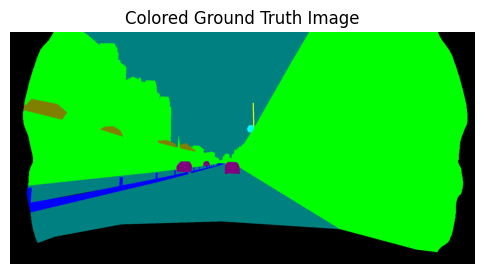

In [199]:
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt

# base_path = '/home/s2/kyubyungchae/MIC/seg/out/2023-09-16 23_11_15/'

# base_path = "/shared/s2/lab01/dataset/sait_uda/data/train_source_gt/"
base_path = "/shared/s2/lab01/dataset/sait_uda/data/train_source_gt_all_blend/"
input_image_path = base_path + 'TRAIN_SOURCE_0100.png'

mask = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
# mask = cv2.resize(mask, (960, 540), Image.NEAREST)

mask[mask == 255] = 12 #배경을 픽셀값 12로 간주
print(np.unique(mask))
num_classes = 13

class_colors = {
    0: (0, 128, 128) ,    # Class 0: Road (Teal)
    1: (255, 0, 0),  # Class 1: Sidewalk (Red)
    2: (0, 255, 0),  # Class 2: Construction (Green)
    3: (0, 0, 255),    # Class 3: Fence (Green (Dark))
    4: (255, 255, 0),  # Class 4: Pole (Yellow)
    5: (255, 0, 255),  # Class 5: Traffic Light (Magenta)
    6: (0, 255, 255),  # Class 6: Traffic Sigh (Cyan)
    7: (128, 128, 0),    # Class 7: Nature (Olive )
    8: (0, 128, 128),    # Class 8: Sky (Blue)
    9: (0, 0, 128),    # Class 9: Person (Navy)
    10: (128, 0, 0),  # Class 10: Rider (Maroon)
    11: (128, 0, 128),  # Class 11: Car (Purple)
    12: (0, 0, 0)  # Class 12: Background (Black)
}

# Create a blank color image to fill with class colors
colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
for class_id, color in class_colors.items():
    colored_mask[mask == class_id] = color


# Visualize the colored ground truth image
plt.figure(figsize=(6, 6))
plt.imshow(colored_mask.astype(np.uint8))
plt.title("Colored Ground Truth Image")
plt.axis('off')
plt.show()



# 차량 프레임 따기

In [1]:
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt

In [2]:
data_path = '/shared/s2/lab01/dataset/sait_uda/data/'
img_path = data_path + 'train_target_image/'

Text(0.5, 1.0, 'Blur Image')

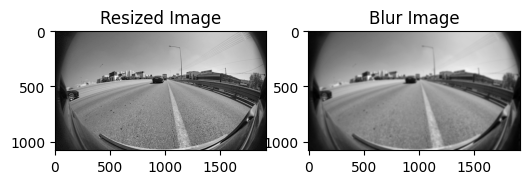

In [11]:
fname = 'TRAIN_TARGET_0000.png'

# 이미지 로드 후 RGB로 변환
image = cv2.imread(img_path + fname)
cv2.resize(image, (960, 540))

image_gr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gaussian Blur 적용
blurred_image = cv2.GaussianBlur(image_gr, (33, 33), 0)

# 출력 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,3))
ax[0].imshow(image_gr, cmap='gray')
ax[0].set_title('Resized Image')

ax[1].imshow(blurred_image, cmap='gray')
ax[1].set_title('Blur Image')

In [14]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# 이미지 파일들이 저장된 디렉토리 경로를 지정합니다.
image_dir = img_path

# 결과 이미지를 저장할 디렉토리를 생성합니다.
output_dir = "output_images/"
os.makedirs(output_dir, exist_ok=True)

# 이미지 파일들을 읽어옵니다.
image_files = os.listdir(image_dir)
image_files.sort()  # 이미지 파일들을 정렬합니다.

image_files[:5]

['TRAIN_TARGET_0000.png',
 'TRAIN_TARGET_0001.png',
 'TRAIN_TARGET_0002.png',
 'TRAIN_TARGET_0003.png',
 'TRAIN_TARGET_0004.png']

In [23]:
fname = 'TRAIN_TARGET_0000.png'

# 이미지 로드 후 RGB로 변환
image = cv2.imread(img_path + fname)
image = cv2.resize(image, (960, 540))

image_gr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Gaussian Blur 적용
blurred_image = cv2.GaussianBlur(image_gr, (33, 33), 0)
blurred_image.shape # (1080, 1920)

(540, 960)

In [55]:
np.random.shuffle(image_files)

In [56]:
image_files[:5]

['TRAIN_TARGET_1941.png',
 'TRAIN_TARGET_1358.png',
 'TRAIN_TARGET_1596.png',
 'TRAIN_TARGET_0502.png',
 'TRAIN_TARGET_1886.png']

In [57]:
# 이전 이미지를 저장하기 위한 변수를 초기화합니다.
variance_image = np.zeros((540, 960), dtype=np.float32)
avg_image = np.zeros((540, 960), dtype=np.float32)

# 이미지 시퀀스를 순회하면서 Temporal Average Filter를 적용합니다.
for idx, image_file in tqdm(enumerate(image_files), total=len(image_files)):
    image_path = os.path.join(image_dir, image_file)
    current_image = cv2.imread(image_path)
    current_image = cv2.resize(current_image, (960, 540))
    current_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
    # Gaussian Blur 적용
    current_image = cv2.GaussianBlur(current_image, (33, 33), 0)

    height, width = current_image.shape
    for i in range(height):
        for j in range(width):
            avg_image[i, j] += int(current_image[i, j])
            variance_image[i, j] += int(current_image[i, j]) * int(current_image[i, j])

    if idx == 1000:
        break




 34%|███▍      | 1000/2923 [50:56<1:37:58,  3.06s/it]


In [58]:
avg_image /= 1000
variance_image /= 1000

In [74]:
# 결과 이미지를 저장합니다.
std_img = np.sqrt(variance_image - avg_image)
std_img[std_img < 50] = 255
output_path = os.path.join(output_dir, image_file)
cv2.imwrite(output_path, std_img)

print("Temporal Average Filter를 적용한 이미지를 저장했습니다.")


Temporal Average Filter를 적용한 이미지를 저장했습니다.


In [29]:
cv2.imwrite(output_path, variance_image)

True

# Ground Truth 보정

In [185]:
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt

data_path = '/shared/s2/lab01/dataset/sait_uda/data/train_source_gt_lbl12/'
# base_path = '/home/s2/kyubyungchae/MIC/seg/out/2023-09-16 23_11_15/'
input_image_path = data_path + 'TRAIN_SOURCE_1291.png'
mask = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
ori_mask = mask.copy()

# mask[mask == 255] = 12 #배경을 픽셀값 12로 간주
print(np.unique(mask))
num_classes = 13

height, width = mask.shape

bottom_third_start = height * 2 // 3
print(bottom_third_start)

[ 0  1  2  3  4  6  7  8 11 12]
682


change # pixels: 14162


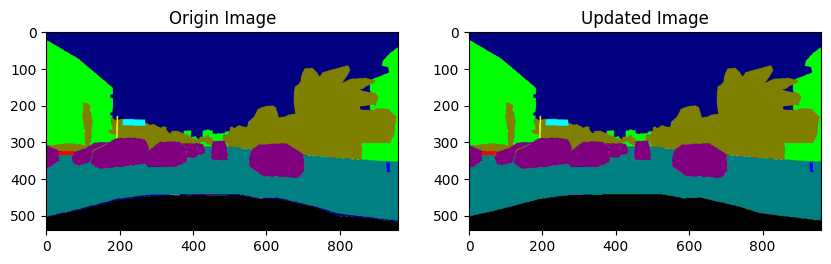

In [186]:
# 이미지의 하단 1/3 부분에 접근하여 원하는 작업 수행
sum = 0
for y in range(bottom_third_start, height):
    for x in range(width):
        if mask[y, x] == 8:
            sum += 1
            mask[y, x] = 12

print("change # pixels:", sum)


mask = cv2.resize(mask, (960, 540), cv2.INTER_NEAREST)
ori_mask = cv2.resize(ori_mask, (960, 540), cv2.INTER_NEAREST)



class_colors = {
    0: (0, 128, 128),    # Class 0: Road (Teal)
    1: (255, 0, 0),      # Class 1: Sidewalk (Red)
    2: (0, 255, 0),      # Class 2: Construction (Green)
    3: (0, 0, 255),      # Class 3: Fence (Green (Dark))
    4: (255, 255, 0),    # Class 4: Pole (Yellow)
    5: (255, 0, 255),    # Class 5: Traffic Light (Magenta)
    6: (0, 255, 255),    # Class 6: Traffic Sign (Cyan)
    7: (128, 128, 0),    # Class 7: Nature (Olive)
    8: (0, 0, 128),      # Class 8: Sky (Blue)
    9: (128, 128, 128),      # Class 9: Person (Grey)
    10: (128, 0, 0),     # Class 10: Rider (Maroon)
    11: (128, 0, 128),   # Class 11: Car (Purple)
    12: (0, 0, 0)        # Class 12: Background (Black)
}

# Create a blank color image to fill with class colors
colored_mask1 = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
colored_mask2 = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
for class_id, color in class_colors.items():
    colored_mask1[mask == class_id] = color
    colored_mask2[ori_mask == class_id] = color
    



# Visualize the colored ground truth image
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

ax[0].imshow(colored_mask2.astype(np.uint8))
ax[0].set_title('Origin Image')

ax[1].imshow(colored_mask1.astype(np.uint8))
ax[1].set_title('Updated Image')

plt.show()



In [109]:
from PIL import Image, ImageDraw, ImageFont

# 클래스 색상 정의
class_colors = {
    0: (0, 128, 128),    # Class 0: Road (Teal)
    1: (255, 0, 0),      # Class 1: Sidewalk (Red)
    2: (0, 255, 0),      # Class 2: Construction (Green)
    3: (0, 0, 255),      # Class 3: Fence (Green (Dark))
    4: (255, 255, 0),    # Class 4: Pole (Yellow)
    5: (255, 0, 255),    # Class 5: Traffic Light (Magenta)
    6: (0, 255, 255),    # Class 6: Traffic Sign (Cyan)
    7: (128, 128, 0),    # Class 7: Nature (Olive)
    8: (0, 0, 128),      # Class 8: Sky (Blue)
    9: (128, 128, 128),      # Class 9: Person (Navy)
    10: (128, 0, 0),     # Class 10: Rider (Maroon)
    11: (128, 0, 128),   # Class 11: Car (Purple)
    12: (0, 0, 0)        # Class 12: Background (Black)
}

# 클래스 이름 정의
class_names = {
    0: "Road",
    1: "Sidewalk",
    2: "Construction",
    3: "Fence",
    4: "Pole",
    5: "Traffic Light",
    6: "Traffic Sign",
    7: "Nature",
    8: "Sky",
    9: "Person",
    10: "Rider",
    11: "Car",
    12: "Background"
}

# 컬러 띠 이미지 크기 정의
stripe_width = 80  # 각 클래스 색상의 높이를 나타냄
stripe_height = 30  # 각 클래스 색상과 클래스 이름을 포함하는 높이

# 컬러 띠 이미지 생성
image_width = stripe_width * len(class_colors)
image_height = stripe_height
image = Image.new('RGB', (image_width, image_height))

# 컬러 띠에 클래스 색상 그리기
draw = ImageDraw.Draw(image)
x = 0
for class_id, color in class_colors.items():
    draw.rectangle([x, 0, x + stripe_width, stripe_height], fill=color)
    x += stripe_width

# 컬러 띠에 클래스 이름 추가
font = ImageFont.load_default()  # 기본 글꼴 사용
draw = ImageDraw.Draw(image)
x = 0
for class_id, class_name in class_names.items():
    text_width, _ = draw.textsize(class_name, font=font)
    text_x = x + (stripe_width - text_width) // 2
    text_y = stripe_height // 2
    draw.text((text_x, text_y), class_name, fill=(255, 255, 255), font=font)
    x += stripe_width

# 이미지 저장
image.save('color_stripes.png')

# 이미지 표시 (선택 사항)
image.show()


/tmp/ipykernel_2000272/636851956.py:58: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, _ = draw.textsize(class_name, font=font)
/tmp/ipykernel_2000272/636851956.py:58: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, _ = draw.textsize(class_name, font=font)
/tmp/ipykernel_2000272/636851956.py:58: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, _ = draw.textsize(class_name, font=font)
/tmp/ipykernel_2000272/636851956.py:58: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, _ = draw.textsize(class_name, font=font)
/tmp/ipykernel_2000272/636851956.py:58: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 

In [ ]:
fname = 'TRAIN_TARGET_0000.png'

# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread(img_path + fname)

In [8]:
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (1000, 600, 150, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rc = cv2.selectROI(image_rgb)



# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rc,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           1,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 1.52004726e-01,  2.43402296e-01,  3.31246624e-01,
          1.77081404e-01,  9.62649498e-02,  1.18618705e+02,
          1.20885256e+02,  1.31987598e+02,  1.47875372e+02,
          1.80639437e+02,  2.16274581e+02,  1.48987877e+02,
          1.35406984e+02,  1.38653572e+02,  4.29839786e+01,
          4.08003328e+01,  5.17304546e+01,  8.56272024e+01,
          1.20394750e+02,  1.57472404e+02,  4.45520471e+03,
          4.03813261e+03,  3.14681176e+03,  4.03813261e+03,
          4.12783270e+03,  3.44197282e+03,  3.14681176e+03,
          3.44197282e+03,  3.44070296e+03,  9.90002268e+02,
          7.56961707e+02,  6.95791806e+02,  7.56961707e+02,
          5.92325620e+02,  5.43636499e+02,  6.95791806e+02,
          5.43636499e+02,  5.13913792e+02,  5.66584559

Text(0.5, 1.0, 'grabCut Image')

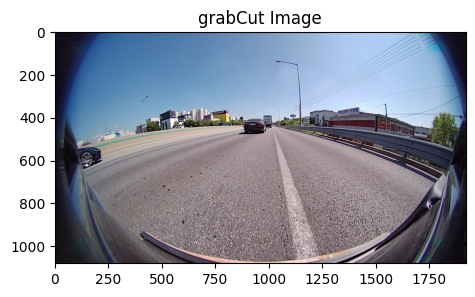

In [9]:
# 출력 
fig, ax = plt.subplots(figsize=(6,3))
ax.imshow(image_rgb, cmap='gray')
ax.set_title('grabCut Image')

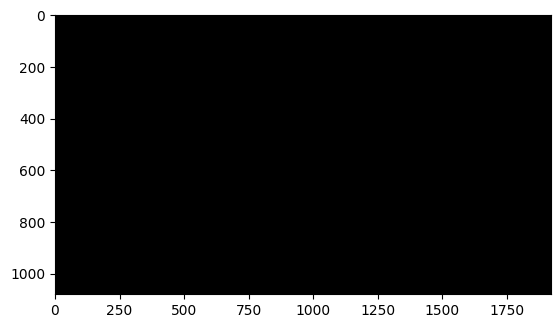

In [10]:
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# input_image_path = '../out/TRAIN_SOURCE_0000_gt_fish01.png'
input_image_path = 'TRAIN_SOURCE_1622-1.png'
mask = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

mask[mask == 255] = 12  # 배경을 픽셀값 12로 간주
num_classes = 13

# Define custom colors for each class
class_colors = {
    0: (0, 128, 128) ,    # Class 0: Road (Teal)
    1: (255, 0, 0),  # Class 1: Sidewalk (Red)
    2: (0, 255, 0),  # Class 2: Construction (Green)
    3: (0, 128, 0),  # Class 3: Fence (Blue)
    4: (255, 255, 0),  # Class 4: Pole (Yellow)
    5: (255, 0, 255),  # Class 5: Traffic Light (Magenta)
    6: (0, 255, 255),  # Class 6: Traffic Sigh (Cyan)
    7: (128, 0, 0),    # Class 7: Nature (Maroon)
    8: (0, 0, 255),    # Class 8: Sky (Green (Dark))
    9: (0, 0, 128),    # Class 9: Person (Navy)
    10: (128, 128, 0),  # Class 10: Rider (Olive)
    11: (128, 0, 128),  # Class 11: Car (Purple)
    12: (0, 0, 0)  # Class 12: Background (Black)
}

# Create a blank color image to fill with class colors
colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)

# Assign class colors to the corresponding pixels
for class_id, color in class_colors.items():
    colored_mask[mask == class_id] = color

# Visualize the colored mask
plt.figure(figsize=(6, 6))
plt.imshow(colored_mask)

im = Image.fromarray(colored_mask)
im.save("colored_mask.png")
plt.title("Colored Ground Truth Image")
plt.axis('off')
plt.show()


[ WARN:0@6686.283] global loadsave.cpp:248 findDecoder imread_('TRAIN_SOURCE_1622-1.png'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object does not support item assignment

/tmp/ipykernel_290250/767448633.py:54: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)
/tmp/ipykernel_290250/767448633.py:54: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)
/tmp/ipykernel_290250/767448633.py:54: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)
/tmp/ipykernel_290250/767448633.py:54: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(label, font=font)
/tmp/ipykernel_290250/767448633.py:54: DeprecationWarning: textsize is deprecated and will be remove

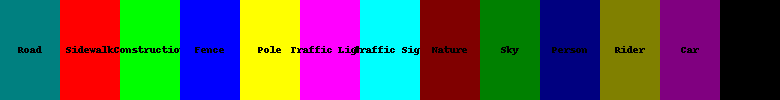

In [5]:
from PIL import Image, ImageDraw, ImageFont

# 클래스 색상 및 라벨 딕셔너리
class_colors = {
    0: (0, 128, 128),    # Class 0: Road (Teal)
    1: (255, 0, 0),      # Class 1: Sidewalk (Red)
    2: (0, 255, 0),      # Class 2: Construction (Green)
    3: (0, 0, 255),      # Class 3: Fence (Blue)
    4: (255, 255, 0),    # Class 4: Pole (Yellow)
    5: (255, 0, 255),    # Class 5: Traffic Light (Magenta)
    6: (0, 255, 255),    # Class 6: Traffic Sign (Cyan)
    7: (128, 0, 0),      # Class 7: Nature (Maroon)
    8: (0, 128, 0),      # Class 8: Sky (Green (Dark))
    9: (0, 0, 128),      # Class 9: Person (Navy)
    10: (128, 128, 0),   # Class 10: Rider (Olive)
    11: (128, 0, 128),   # Class 11: Car (Purple)
    12: (0, 0, 0)        # Class 12: Background (Black)
}

class_labels = {
    0: "Road",
    1: "Sidewalk",
    2: "Construction",
    3: "Fence",
    4: "Pole",
    5: "Traffic Light",
    6: "Traffic Sign",
    7: "Nature",
    8: "Sky",
    9: "Person",
    10: "Rider",
    11: "Car",
    12: "Background"
}

# 이미지 크기 및 배경색
image_width = len(class_colors) * 60  # 가로로 연결된 네모의 간격을 더 넓게 조정
image_height = 100  # 네모의 높이
background_color = (255, 255, 255)  # White

# 이미지 생성
image = Image.new("RGB", (image_width, image_height), background_color)
draw = ImageDraw.Draw(image)

# 클래스 별로 색상 네모와 라벨 그리기
x_position = 0
for class_id, color in class_colors.items():
    # 네모 그리기
    draw.rectangle([x_position, 0, x_position + 60, image_height], fill=color)
    
    # 라벨 그리기
    label = class_labels[class_id]
    font = ImageFont.load_default()  # 기본 폰트 사용
    text_width, text_height = draw.textsize(label, font=font)
    draw.text(
        ((x_position + x_position + 60 - text_width) // 2, (image_height - text_height) // 2),
        label,
        fill=(255, 255, 255)  # 텍스트 색상 (검정색)
    )
    
    x_position += 60  # 다음 네모의 시작 위치 업데이트

# 이미지 저장 또는 표시
image.save("class_colors_horizontal.png")  # 이미지 저장
image.show()  # 이미지 표시


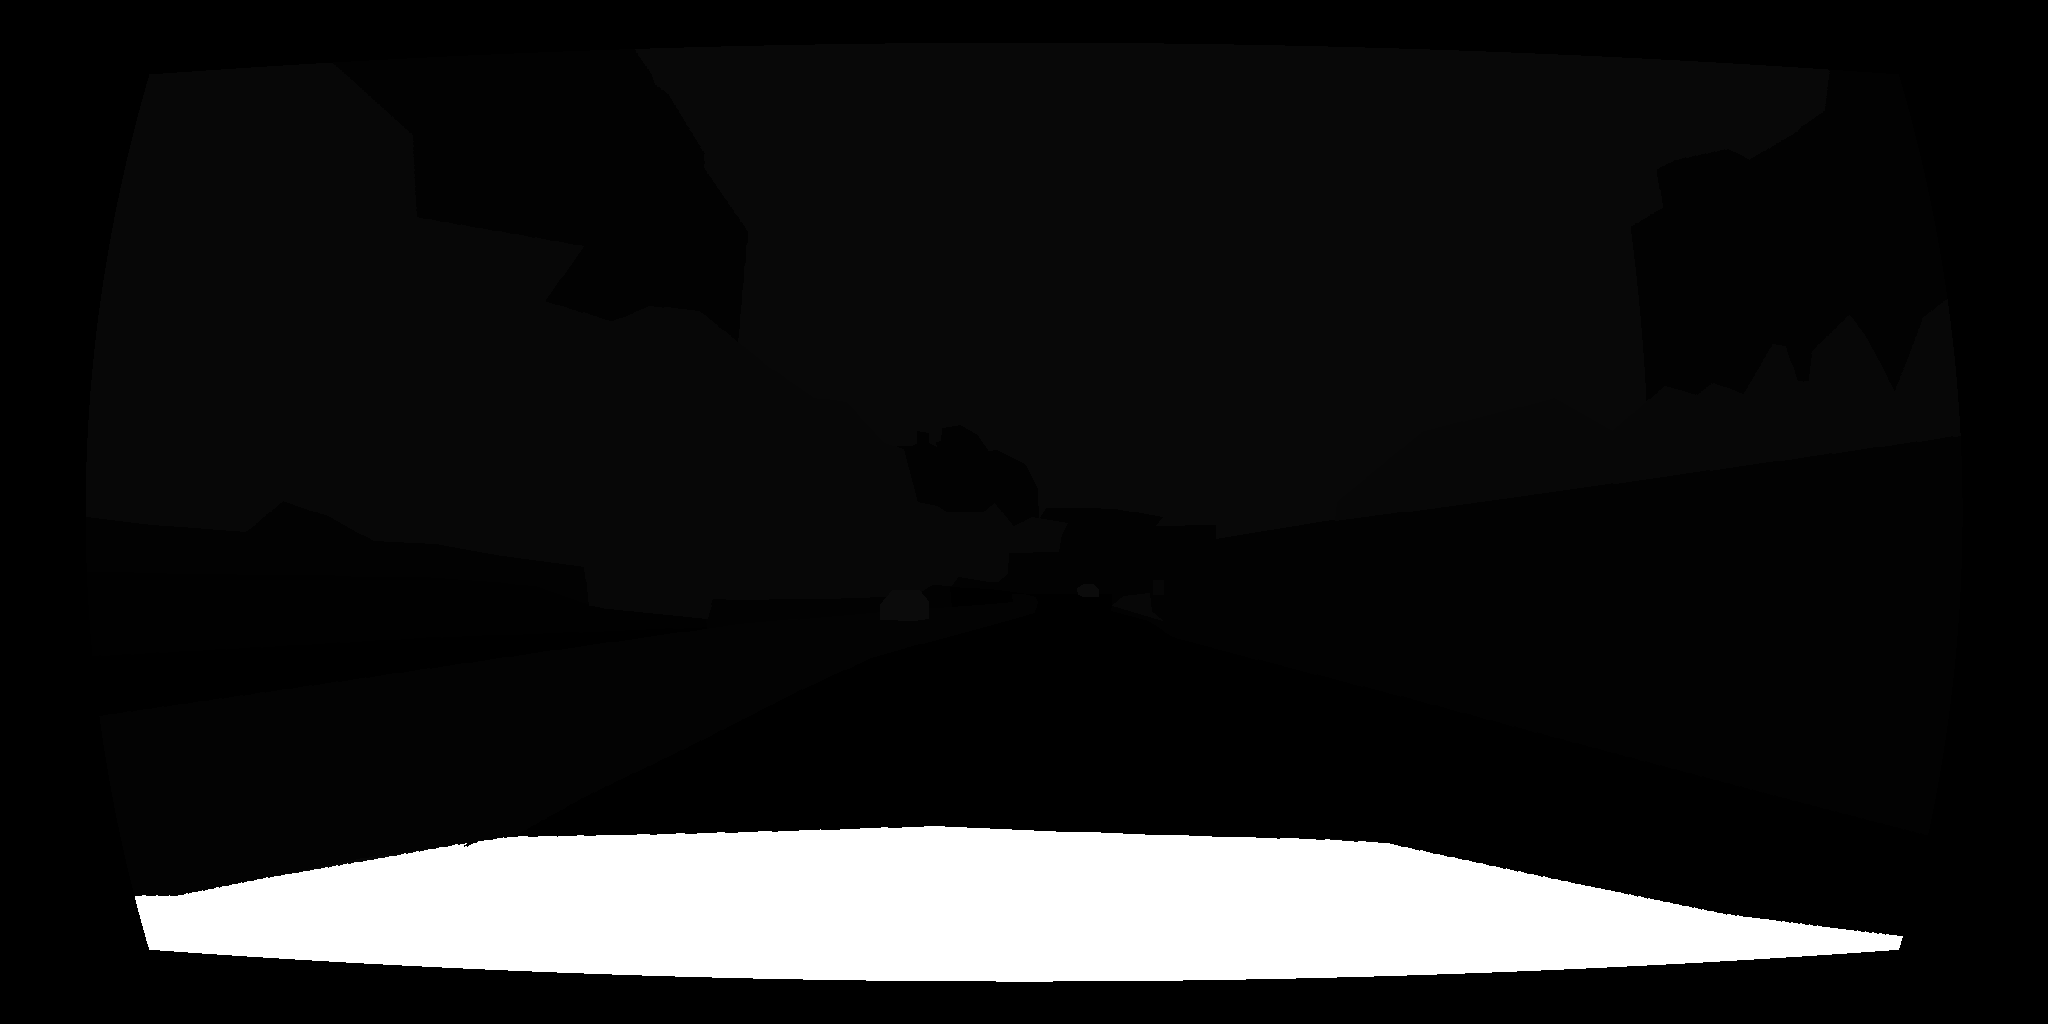

In [62]:
import os
import cv2
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np

def make_mask(width=2048, height=1024, is_image=True):

    # Create a black canvas
    mask_color = 0 if is_image else 255

    lum_img = Image.new('L', (width, height), mask_color)
    # Setting the points for cropped image
    frac = 0.99

    left = width * ((1 - frac) / 2)
    upper = height * ((1 - frac) / 2)
    right = width - ((1 - frac) / 2) * width
    bottom = height - ((1 - frac) / 2) * height

    draw = ImageDraw.Draw(lum_img)
    draw.pieslice([(0, 0), (width, height)], 0, 360, fill=(255-mask_color), outline="black")
    lum_img = lum_img.crop((left, upper, right, bottom))
    lum_img = lum_img.resize((width, height))

    # Calculate the new upper boundary for cropping
    new_upper = 180  # Adjust this value as needed

    # Crop the upper part of the rounded frame
    cropped_lum_img = lum_img.crop((0, new_upper, width, height))
    cropped_lum_img = cropped_lum_img.resize((width, height))

    return cropped_lum_img


input_image_path = '../out/TRAIN_SOURCE_0000_gt_fish01.png'
gt = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
cropped_lum_gt = make_mask(is_image=False)


gt

# width, height = 2048, 1024
# masked_gt = np.array(gt) + np.array(cropped_lum_gt)
# masked_gt= Image.fromarray(masked_gt.astype('uint8'))

# masked_gt = masked_gt.crop((0, 80, width, height))
# masked_gt = masked_gt.resize((width, height))

# masked_gt.show()
Image.fromarray(gt.astype('uint8'))


In [35]:
import os
from tqdm import tqdm
from PIL import Image, ImageDraw


def crop_image(image, frac = 0.90):

    # Setting the points for cropped image

    width, height = image.size
    left = width * ((1 - frac) / 2)
    upper = height * ((1 - frac) / 2)
    right = width - ((1 - frac) / 2) * width
    bottom = height - ((1 - frac) / 2) * height

    # print((left, upper, right, bottom))
    image = image.crop((left, upper, right, 870))
    image = image.resize((width, height))
    return image

def make_mask(width=2048, height=1024, is_image=True):

    # Create a black canvas
    mask_color = 255 if is_image else 0

    lum_img = Image.new('L', (width, height), mask_color)
    # Setting the points for cropped image
    frac = 0.99

    left = width * ((1 - frac) / 2)
    upper = height * ((1 - frac) / 2)
    right = width - ((1 - frac) / 2) * width
    bottom = height - ((1 - frac) / 2) * height

    draw = ImageDraw.Draw(lum_img)
    draw.pieslice([(0, 0), (width, height)], 0, 360, fill=abs(255 - mask_color), outline="white")
    lum_img = lum_img.crop((left, upper, right, bottom))
    lum_img = lum_img.resize((width, height))

    # Calculate the new upper boundary for cropping
    new_upper = 180  # Adjust this value as needed

    # Crop the upper part of the rounded frame
    cropped_lum_img = lum_img.crop((0, new_upper, width, height))
    cropped_lum_img = cropped_lum_img.resize((width, height))

    return cropped_lum_img



if __name__ == '__main__':
    # Load the image
    base_path = "/shared/s2/lab01/dataset/fish/train_source_fish"
    out_path = "/shared/s2/lab01/dataset/fish/train_source"

    # Check if the base path exists
    if not os.path.exists(base_path):
        print(f"Directory '{base_path}' does not exist.")
    else:
        # List all files in the directory
        file_list = os.listdir(base_path)
        file_list = sorted(file_list)

        cropped_lum_img = make_mask(is_image=True)
        cropped_lum_gt = make_mask(is_image=False)

        # Print the list of file names
        for file_name in tqdm(file_list):
            input_image = Image.open(base_path + '/' + file_name)
            input_gt = Image.open(base_path + '_gt/' + file_name)

            image = crop_image(input_image)    
            gt = crop_image(input_gt)    
            width, height = image.size
            
            # Apply the mask to the input image
            masked_image = Image.new("RGB", (width, height))
            masked_image.paste(image, mask=cropped_lum_img)
            masked_image = masked_image.crop((0, 80, width, height))
            masked_image = masked_image.resize((width, height))

            masked_gt = Image.new("RGB", (width, height))
            masked_gt.paste(gt, mask=cropped_lum_gt)
            masked_gt = masked_gt.crop((0, 80, width, height))
            masked_gt = masked_gt.resize((width, height))

            # Display or save the result
            break
            file_name = file_name[:-11] + '.png' # TRAIN_SOURCE_0433_fish02.png
            # masked_image.save(out_path + '_image/' + file_name)
            # masked_gt.save(out_path + '_gt/' + file_name)

  0%|          | 0/2194 [00:00<?, ?it/s]


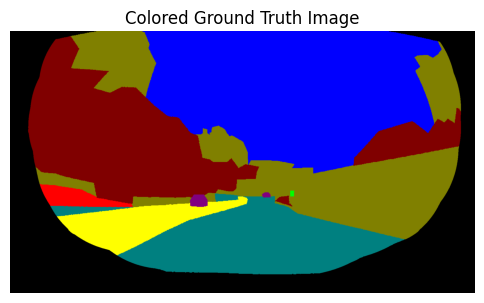

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# input_image_path = '/shared/s2/lab01/dataset/fish/train_source_gt_blend/TRAIN_SOURCE_0001.png'
input_image_path = 'after_TRAIN_SOURCE_0000.png'
mask = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)


mask[mask == 255] = 12  # 배경을 픽셀값 12로 간주
num_classes = 13

# Define custom colors for each class
class_colors = {
    0: (0, 128, 128) ,    # Class 0: Teal
    1: (255, 0, 0),  # Class 1: Red
    2: (128, 128, 0),  # Class 10: Olive
    3: (255, 255, 0),  # Class 4: Yellow
    4: (0, 128, 0),    # Class 8: Green (Dark)
    5: (255, 0, 255),  # Class 5: Magenta
    6: (0, 255, 0),  # Class 2: Green
    7: (128, 0, 0),    # Class 7: Maroon
    8: (0, 0, 255),  # Class 3: Blue
    9: (0, 0, 128),    # Class 9: Navy
    10: (0, 255, 255),  # Class 6: Cyan
    11: (128, 0, 128),  # Class 11: Purple
    12: (0, 0, 0)  # Class 12: Black
}

# Create a blank color image to fill with class colors
colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)

# Assign class colors to the corresponding pixels
for class_id, color in class_colors.items():
    colored_mask[mask == class_id] = color

# Visualize the colored mask
plt.figure(figsize=(6, 6))
plt.imshow(colored_mask)
plt.title("Colored Ground Truth Image")
plt.axis('off')
plt.show()


# Barrel distortion

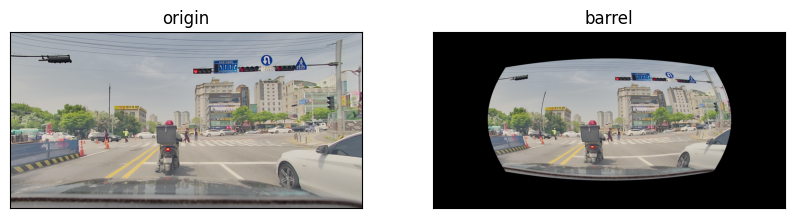

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 왜곡 계수 설정
k1, k2, k3 = 0.8, 0.3, 0.0 # 배럴 왜곡


input_image_path = '../images/TRAIN_SOURCE_0088.png'
origin_img = cv2.imread(input_image_path)
origin_rows, origin_cols = origin_img.shape[:2]
img = cv2.resize(origin_img, (origin_cols, origin_cols), interpolation=cv2.INTER_LANCZOS4)
rows, cols = img.shape[:2]

# 매핑 배열 생성
mapy, mapx = np.indices((rows, cols), dtype=np.float32)

# 중앙점 좌표로 -1~1 정규화 및 극좌표 변환
mapx = 2 * mapx / (cols-1) - 1
mapy = 2 * mapy / (rows-1) - 1

r, theta = cv2.cartToPolar(mapx, mapy)

# 방사 왜곡 변형 연산
ru = r * (1 + k1*(r**2) + k2*(r**4) + k3*(r**6))

# 직교 좌표 및 좌상단 기존으로 복원
mapx, mapy = cv2.polarToCart(ru, theta)

mapx = ((mapx + 1) * cols - 1) / 2
mapy = ((mapy + 1) * rows - 1) / 2

# 리 매핑
distored = cv2.remap(img, mapx, mapy, cv2.INTER_LANCZOS4)

distored = cv2.resize(distored, (origin_cols, origin_rows), interpolation=cv2.INTER_LANCZOS4)

plt.figure(figsize=(10,6))
imgs = {'origin':origin_img, 'barrel': distored}
for i, (k,v) in enumerate(imgs.items()):
    plt.subplot(1, 2, i+1)
    plt.title(k)
    plt.imshow(v[:,:,(2,1,0)])
    plt.xticks([]), plt.yticks([])

plt.show()





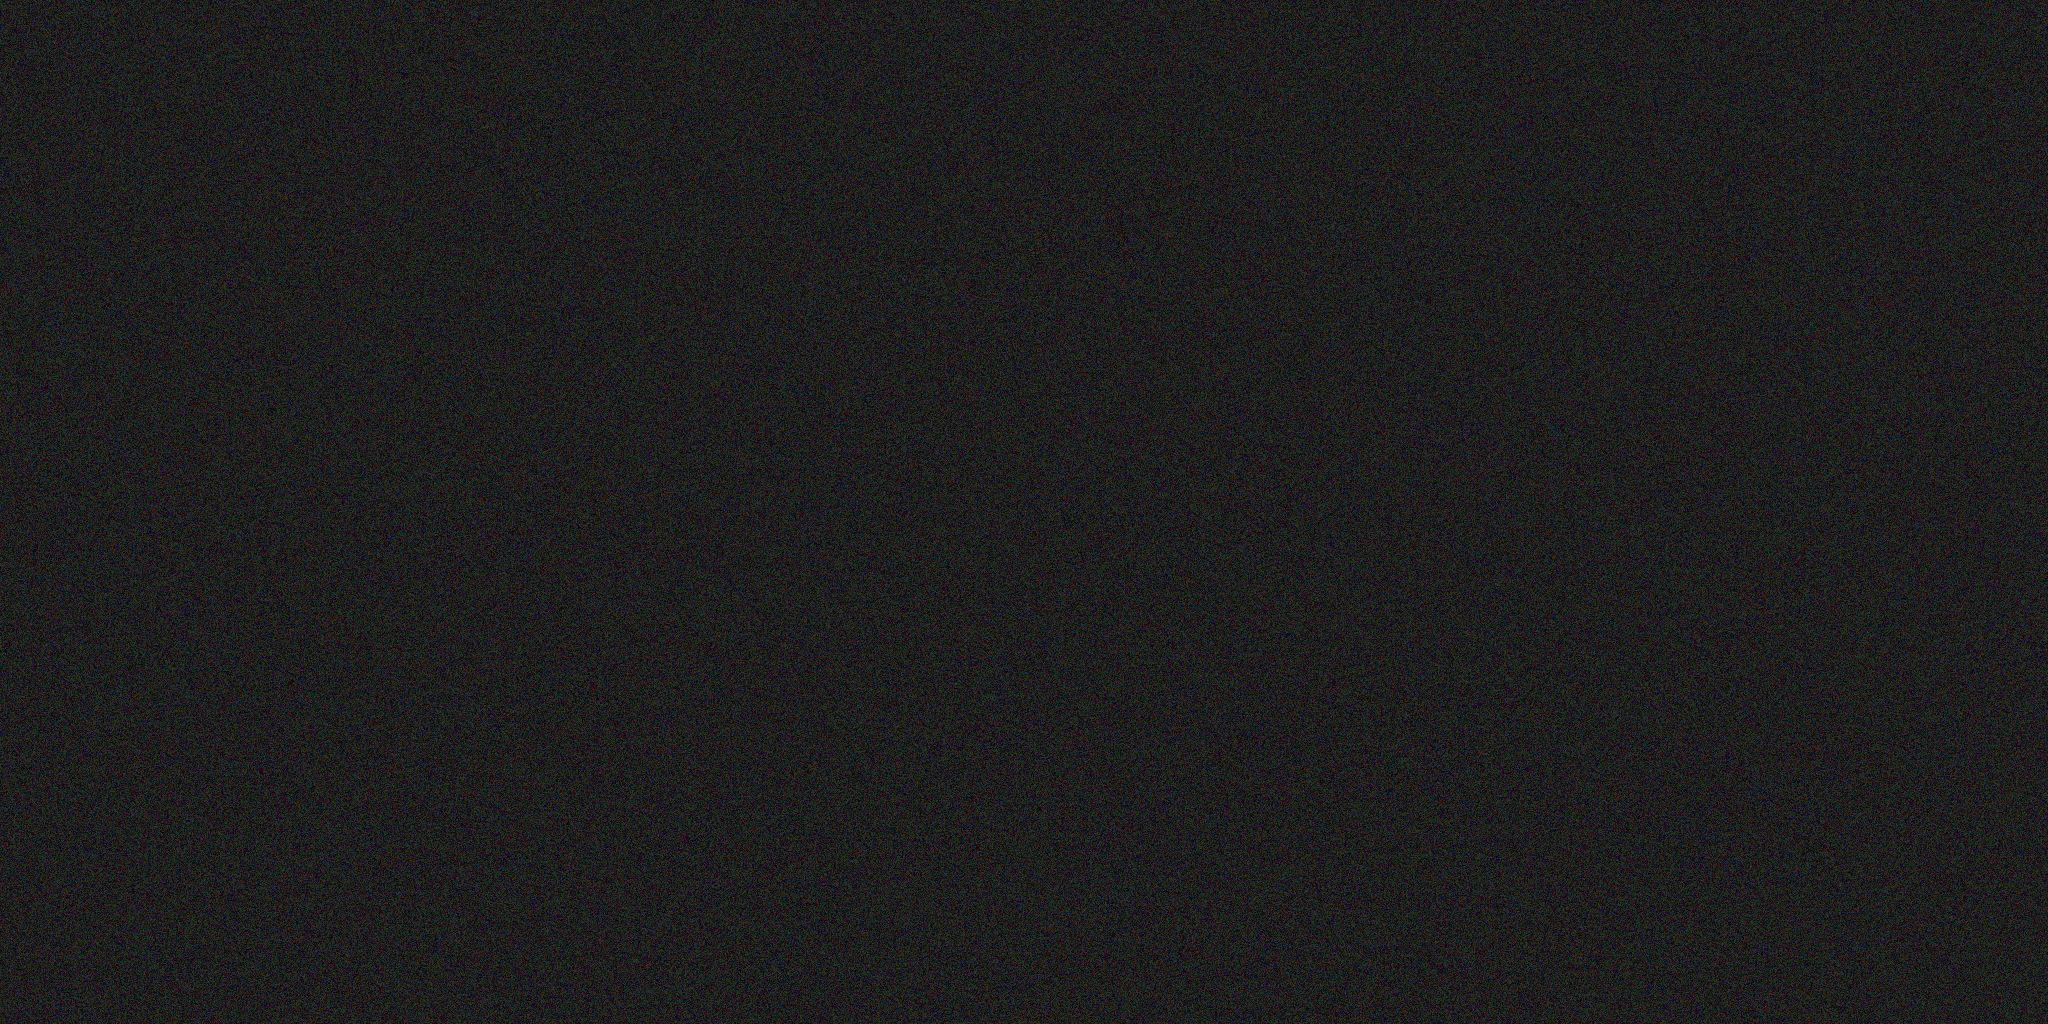

In [41]:
import numpy as np
from PIL import Image 

input_image_path = '../images/TRAIN_SOURCE_0088.png'
image = cv2.imread(input_image_path)

def generate_random_pixels_like(image):
    # 이미지와 같은 크기의 랜덤한 값으로 채워진 배열 생성
    random_pixels = np.random.randint(0, 61, size=image.shape, dtype=np.uint8)
    return random_pixels


final_img_arr = generate_random_pixels_like(image)
final_img = Image.fromarray(final_img_arr.astype(np.uint8))
final_img.show()

